In [15]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [16]:
covid_df = pd.read_csv('worldometer_data (1).csv')

In [17]:
#covid_df.dropna(inplace = True)
#before=covid_df.dtypes

In [18]:
#covid_df["Total Tests"] = covid_df["Total Tests"].astype(int)

In [19]:
#print(type(covid_df))
covid_df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [20]:
covid_df['TotalTests'].describe()

count    1.910000e+02
mean     1.402405e+06
std      5.553367e+06
min      6.100000e+01
25%      2.575200e+04
50%      1.357020e+05
75%      7.576960e+05
max      6.313960e+07
Name: TotalTests, dtype: float64

In [21]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [22]:
covid_df['Tests/1M pop'].corr(covid_df['Tot Cases/1M pop'])

0.30272789356786767

In [23]:
covid_df[['Tot Cases/1M pop', 'Tests/1M pop', 'Deaths/1M pop']].corr()

,Tot Cases/1M pop,Tests/1M pop,Deaths/1M pop
Tot Cases/1M pop,1.000000,0.302728,0.502134
Tests/1M pop,0.302728,1.000000,0.156827
Deaths/1M pop,0.502134,0.156827,1.000000


In [24]:
covid_df.shape

(209, 16)

In [25]:
covidtest_df=covid_df.sort_values(by='Tests/1M pop', ascending=False)
covidtest_df.tail(20)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
78,Sudan,Africa,43943536.0,11780,NaN,763.0,NaN,6194.0,NaN,4823.0,NaN,268.0,17.0,401.0,9.0,EasternMediterranean
131,Yemen,Asia,29886897.0,1768,NaN,508.0,NaN,898.0,NaN,362.0,NaN,59.0,17.0,120.0,4.0,EasternMediterranean
54,Algeria,Africa,43926079.0,33626,NaN,1273.0,NaN,23238.0,NaN,9115.0,57.0,766.0,29.0,NaN,NaN,Africa
82,DRC,Africa,89802183.0,9309,NaN,215.0,NaN,8048.0,NaN,1046.0,NaN,104.0,2.0,NaN,NaN,Africa
86,Tajikistan,Asia,9557468.0,7665,NaN,62.0,NaN,6443.0,NaN,1160.0,NaN,802.0,6.0,NaN,NaN,Europe
106,Nicaragua,North America,6632263.0,3902,NaN,123.0,NaN,2913.0,NaN,866.0,NaN,588.0,19.0,NaN,NaN,Americas
108,Congo,Africa,5530506.0,3546,NaN,58.0,NaN,1589.0,NaN,1899.0,NaN,641.0,10.0,NaN,NaN,Africa
111,Somalia,Africa,15933012.0,3227,NaN,93.0,NaN,1728.0,NaN,1406.0,2.0,203.0,6.0,NaN,NaN,EasternMediterranean
130,Sierra Leone,Africa,7992169.0,1877,NaN,67.0,NaN,1427.0,NaN,383.0,NaN,235.0,8.0,NaN,NaN,Africa
138,Liberia,Africa,5068618.0,1224,NaN,78.0,NaN,705.0,NaN,441.0,NaN,241.0,15.0,NaN,NaN,Africa


In [26]:
covidtest_df = covidtest_df[covidtest_df['Tests/1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Tot Cases/1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Deaths/1M pop'].notna()]

In [27]:
#covidtest_df.drop(covidtest_df.tail(18).index,inplace=True)
print(covidtest_df.shape)
H_test = covidtest_df.iloc[0:57]
print(H_test.shape)
M_test = covid_df.iloc[57:114]
print(M_test.shape)
L_test = covid_df.iloc[114:171]
print(L_test.shape)

(173, 16)
(57, 16)
(57, 16)
(57, 16)


In [28]:
H_test.head(20)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
91,Luxembourg,Europe,626952.0,7073,NaN,119.0,NaN,5750.0,NaN,1204.0,9.0,11282.0,190.0,623994.0,995282.0,Europe
185,Monaco,Europe,39270.0,125,NaN,4.0,NaN,105.0,NaN,16.0,2.0,3183.0,102.0,38209.0,972982.0,Europe
38,UAE,Asia,9902079.0,61845,NaN,354.0,NaN,55739.0,NaN,5752.0,NaN,6246.0,36.0,5262658.0,531470.0,EasternMediterranean
47,Bahrain,Asia,1706669.0,42889,NaN,156.0,NaN,39945.0,NaN,2788.0,41.0,25130.0,91.0,876700.0,513691.0,EasternMediterranean
176,Cayman Islands,North America,65798.0,203,NaN,1.0,NaN,202.0,NaN,0.0,NaN,3085.0,15.0,31108.0,472780.0,NaN
129,Iceland,Europe,341465.0,1930,NaN,10.0,NaN,1825.0,NaN,95.0,NaN,5652.0,29.0,149693.0,438385.0,Europe
180,Bermuda,North America,62254.0,157,NaN,9.0,NaN,144.0,NaN,4.0,NaN,2522.0,145.0,26352.0,423298.0,Americas
147,Malta,Europe,441663.0,946,NaN,9.0,NaN,670.0,NaN,267.0,NaN,2142.0,20.0,136713.0,309541.0,Europe
73,Denmark,Europe,5794279.0,14306,NaN,617.0,NaN,12787.0,NaN,902.0,2.0,2469.0,106.0,1654512.0,285542.0,Europe
11,UK,Europe,67922029.0,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe


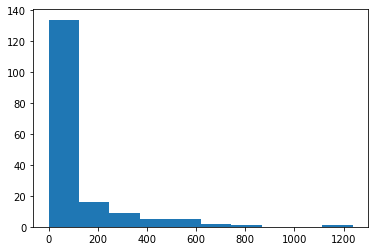

In [29]:
plt.hist(covidtest_df['Deaths/1M pop'])
plt.show()

/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


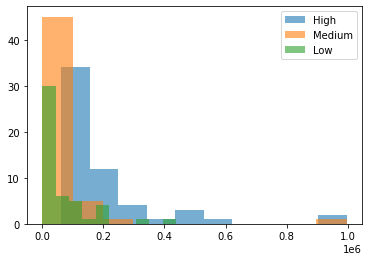

In [30]:
plt.hist(H_test['Tests/1M pop'], alpha = .6, label = "High")
plt.hist(M_test['Tests/1M pop'], alpha = .6, label = "Medium")
plt.hist(L_test['Tests/1M pop'], alpha = .6, label = "Low")
plt.legend(loc="upper right")
plt.show()

In [33]:
M_test.fillna(M_test.mean(), inplace=True)
L_test.fillna(M_test.mean(), inplace=True)

/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
print(stats.describe(H_test['Tests/1M pop']))
print(stats.describe(M_test['Tests/1M pop']))
print(stats.describe(L_test['Tests/1M pop']))

DescribeResult(nobs=57, minmax=(62085.0, 995282.0), mean=193225.49122807017, variance=35986140396.89725, skewness=2.8474399605506107, kurtosis=8.561648378514672)
DescribeResult(nobs=57, minmax=(9.0, 995282.0), mean=65360.09615384614, variance=18358763642.866413, skewness=5.892720759513464, kurtosis=37.48375476282421)
DescribeResult(nobs=57, minmax=(4.0, 438385.0), mean=59017.102901484475, variance=6541642465.513372, skewness=2.574445438505862, kurtosis=8.039019368738064)


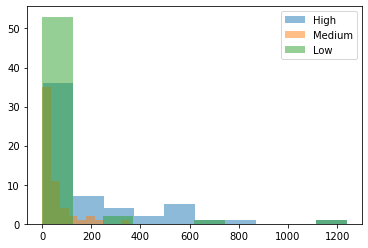

In [35]:
plt.hist(H_test['Deaths/1M pop'], alpha = .5, label = "High")
plt.hist(M_test['Deaths/1M pop'], alpha = .5, label = "Medium")
plt.hist(L_test['Deaths/1M pop'], alpha = .5, label = "Low")
plt.legend(loc="upper right")
plt.show()

In [36]:
print(stats.describe(H_test['Deaths/1M pop']))
print(stats.describe(M_test['Deaths/1M pop']))
print(stats.describe(L_test['Deaths/1M pop']))

DescribeResult(nobs=57, minmax=(4.0, 1238.0), mean=191.52631578947367, variance=63331.03947368421, skewness=2.0206939593730424, kurtosis=4.248941124824906)
DescribeResult(nobs=57, minmax=(0.8, 358.0), mean=49.0140350877193, variance=4739.718370927318, skewness=2.463255138029247, kurtosis=6.718621586509473)
DescribeResult(nobs=57, minmax=(0.08, 1238.0), mean=57.37407202216067, variance=35363.30388042336, skewness=5.131419079876497, kurtosis=27.397350943637285)


In [37]:
print(stats.kruskal(H_test['Deaths/1M pop'], M_test['Deaths/1M pop'], L_test['Deaths/1M pop']))


KruskalResult(statistic=45.45747004810807, pvalue=1.345971296403648e-10)


In [38]:
print(stats.mannwhitneyu(x=H_test['Deaths/1M pop'], y=L_test['Deaths/1M pop']))
print(stats.mannwhitneyu(x=H_test['Deaths/1M pop'], y=M_test['Deaths/1M pop']))
print(stats.mannwhitneyu(x=M_test['Deaths/1M pop'], y=L_test['Deaths/1M pop']))

MannwhitneyuResult(statistic=526.5, pvalue=2.460468188567344e-10)
MannwhitneyuResult(statistic=819.0, pvalue=2.5171450536149593e-06)
MannwhitneyuResult(statistic=1095.5, pvalue=0.0013642151968324542)
